# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at a used car dealership in the UK. The sales team have been having problems with pricing used cars that arrive at the dealership and would like your help. Before they take any company wide action they would like you to work with the Toyota specialist to test your idea. They have already collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

The presentation of your findings should be targeted at the Head of Sales, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

# Defining Goals
## Business Problem Statement
> The sales team of a used car dealearship in the UK has encoutered problems in **pricing the used cars** arrived at the dealership. I would like to help them **predict the prices of used cars** with a **positive perdiction error less than £1500**. The **Head of Sales** will be the one who I report my findings to, and if the findings are insightful, they will formulate thier company-wide strategy based on these findings.
## Exepcted Outcomes
1. **A model** capable of predicting prices of used car
2. Insights about **key features** that determine the predicted prices
3. Non-technical explanations of the model and the insights (in the slides)

# Preparation
Let's first import the necessary libraries and do some basic configurations. 
Then, we read the data and take a peek of it.

In [174]:
# Import libraries for later use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

%matplotlib inline
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(8, 6)})

In [175]:
# Read the data
toyota = pd.read_csv('data/toyota.csv')

In [176]:
# Take a look at `toyota`
print(toyota.head())
print(toyota.columns)
print(toyota.shape)

   model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
(6738, 9)


# Exploratory Data Analysis
## Data Types
Here, we would like to get to know the data better to facilitate our analysis afterwards. Let's start from examining the basic information about the data.

In [177]:
# Take a look of the basic info of `toyota`
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Based on the casestudy description, we can be sure that `model`, `transmission`, and `fuelType` are categorical variables. Also, `year` and `engineSize` are discrete nuemrical variables, and `price`, `mileage`, `tax`, and `mpg` are continuous variables.

In [178]:
# turn the columns of object type into categorical ones
cat_columns = ['model', 'transmission', 'fuelType']
for col in cat_columns:
    toyota[col] = toyota[col].astype('category')
    
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         6738 non-null   category
 1   year          6738 non-null   int64   
 2   price         6738 non-null   int64   
 3   transmission  6738 non-null   category
 4   mileage       6738 non-null   int64   
 5   fuelType      6738 non-null   category
 6   tax           6738 non-null   int64   
 7   mpg           6738 non-null   float64 
 8   engineSize    6738 non-null   float64 
dtypes: category(3), float64(2), int64(4)
memory usage: 336.8 KB


## Target Variable
Since our final goal is to predict the price of used cars, the `price` column should be our target variable.

For the same reason ,we need to a little bit fo investigation on it to get ourselves familiarized with it.

In [179]:
# Do a descriptive summary
toyota.price.describe()

count     6738.000000
mean     12522.391066
std       6345.017587
min        850.000000
25%       8290.000000
50%      10795.000000
75%      14995.000000
max      59995.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Distribution of Prices (GBP)')

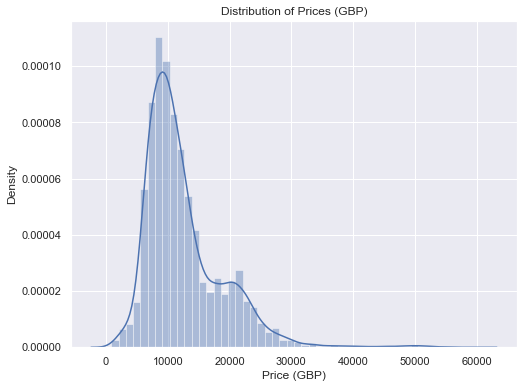

In [200]:
# Draw a hist plot
sns.distplot(toyota.price)
plt.xlabel('Price (GBP)')
plt.title('Distribution of Prices (GBP)')

From the chart above, we can see:
- The distribution deviates from a normal distribution
- It has positive skewness

We should take note on this.

## Categorical Variables vs. Target Variable
Following, we are going to see the relationships between the categorical variables and the target variable. We are doing so because we need to understand these relationships to provide evidences for **Goal no.2**

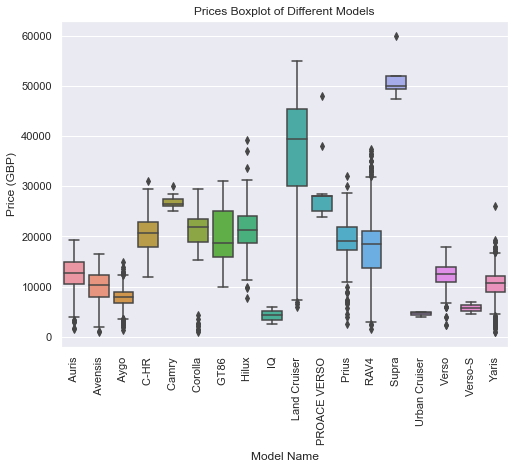

In [181]:
# Draw a boxplot of model against price
sns.boxplot(x='model', y='price', data=toyota)
plt.xlabel('Model Name')
plt.ylabel('Price (GBP)')
plt.title('Prices Boxplot of Different Models')
plt.xticks(rotation=90)
plt.show()

We can see that there are price differeneces among different models and the price variances of each model are also quite diffenent. Keep this in mind as we will come back later on engineering this variable in order to make our model perform better.

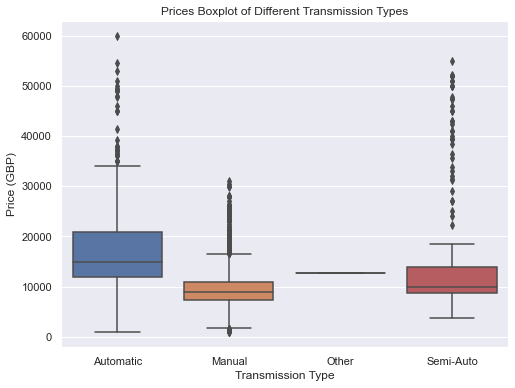

In [182]:
# transmission against price
sns.boxplot(x='transmission', y='price', data=toyota)
plt.xlabel('Transmission Type')
plt.ylabel('Price (GBP)')
plt.title('Prices Boxplot of Different Transmission Types')
plt.show()

There seem to be visiable price differences among the transmission types. However, there are a lot of outliers presented. When lots of outliers are presented in the data, it may damage the predictability of our model if we train it by using this variable. So, we need be careful here.

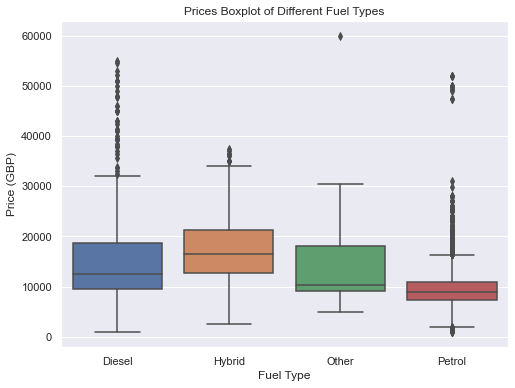

In [183]:
# fuel type against price
sns.boxplot(x='fuelType', y='price', data=toyota)
plt.xlabel('Fuel Type')
plt.ylabel('Price (GBP)')
plt.title('Prices Boxplot of Different Fuel Types')
plt.show()

It's clear that the median price of Hybrid is higher than the median prices of others. Again, there are quite a lot of outliers. Like what was mentioned above, we need to keep an eye on this variable for the sake of performance of the model.

## Discrete Numerical Variables vs. Target Variable

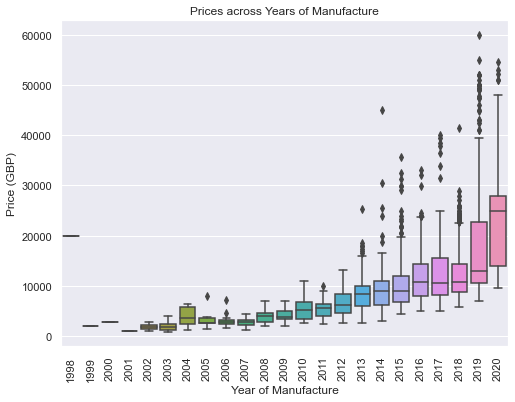

In [184]:
# year against price
sns.boxplot(x='year', y='price', data=toyota)
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (GBP)')
plt.title('Prices across Years of Manufacture')
plt.xticks(rotation=90)
plt.show()

Generally speaking, newer cars have higher prices and there seems to be a exponentially upward trend to the right side of the graph.

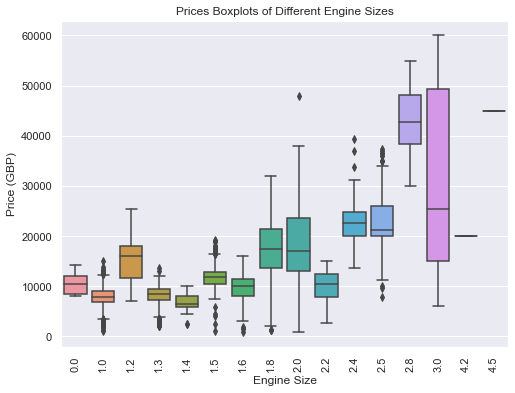

In [185]:
# engineSize against price
sns.boxplot(x='engineSize', y='price', data=toyota)
plt.xlabel('Engine Size')
plt.ylabel('Price (GBP)')
plt.title('Prices Boxplots of Different Engine Sizes')
plt.xticks(rotation=90)
plt.show()

We cannot obeserve a clear trends, so further investigations may be needed.

## Numeric Variables

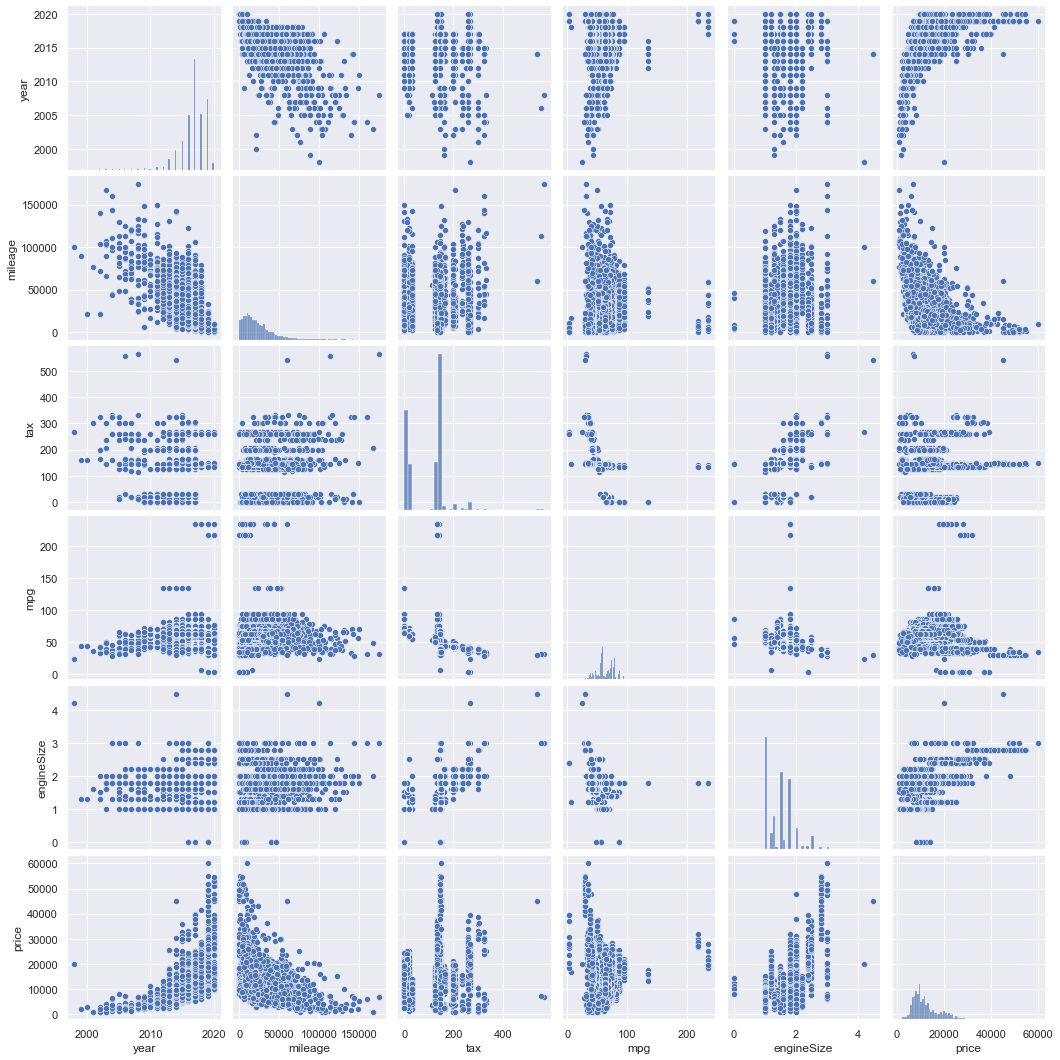

In [186]:
# Draw a pairplot using only numeric varaibles
con_vars = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']
sns.pairplot(toyota[con_vars])
plt.show()

The pair plot gives us some interesting ideas about the relationships among the variables:
1. `year` and `mileage` seems to have a medium negative linear relationship, and this relationship appears to be reasonable because older used car usaully have higher mileage.
2. `year` and `price` seems to have a shy transposed expoential distribution.
3. `mileage` and `price` seems to have a shy exponential distribution.

Now, we have a better understanding about the dataset and is about to be ready to builid a model. Let's keep it going.

## Correlations

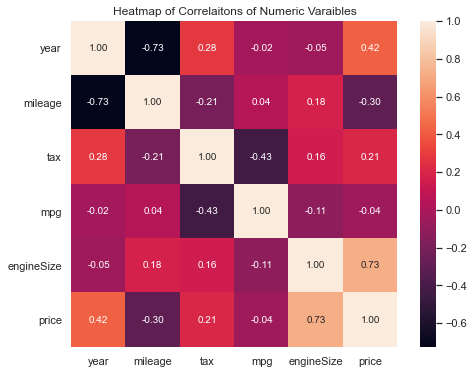

In [187]:
# Draw a heatmap of correlations
cm = toyota[con_vars].corr()
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cm.index.values, xticklabels=cm.index.values)
plt.title('Heatmap of Correlaitons of Numeric Varaibles')
plt.show()

1. As we expected, `year`and `mileage`have a negative correlation
2. Out of our expectation, `engineSize` and `price` share a medium-strong correlation

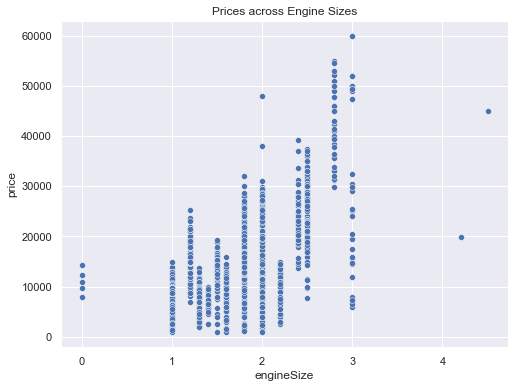

In [188]:
# We need to further investigate the relationships between `engineSize` and `price`
sns.scatterplot(x='engineSize', y='price', data=toyota)
plt.title('Prices across Engine Sizes')
plt.show()

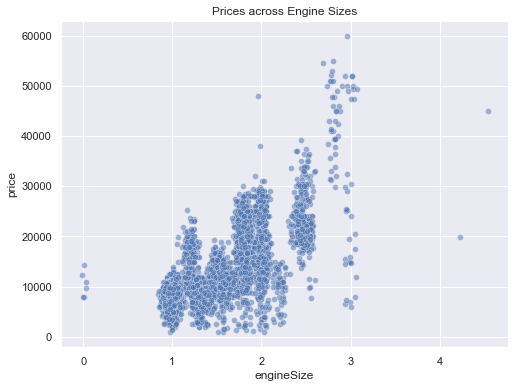

The correlation after jittering is: 0.7231764792254944


In [189]:
# jitter the `engineSize` values to make the relationship more obvious
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

engineSize_jittered = rand_jitter(toyota.engineSize)
sns.scatterplot(x = engineSize_jittered, y=toyota.price, alpha=0.5)
plt.title('Prices across Engine Sizes')
plt.show()

print('The correlation after jittering is: {}'.format(np.corrcoef(engineSize_jittered, toyota.price)[0, 1]))

We now can see a more clear linear relationship between `price` and `engine`. Another finding that can be added to our collection of insights for **Goal No.2**.

# Data Cleaning
## Missing Data

In [190]:
toyota.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Fantastic! There is no missing value presented!

# Model Selection
Recall that our goal is to be able to predict the prices of used cars, and there are also other details to be noted:
1. The estimation error value should not be greater than £1500. --> Mean absolute error (MAE) would be a great metric that can represent this constraint well.*
2. The audience of the presentation is someone with no technical background. --> A model that can be easily explained would be great.
3. The target variable is `price`, which is a continuous variable --> The model should be a regression model.

**note: The MAE (Mean Absolute Error) is the mean of the absolute differences between the actual values and the predictions. This tells us the magnitude of the error, so, as long as the vlaue is lower than 1500, we can state that criteria is met.*

In response to the details, a regression decision tree can bring the following benefits:
1. MAE can be used to evaluate the model
2. The model is easy to understand and the result is easy to interpret.
3. It is a regression model

plus, it can capture non-linear relationships, which we observe some during the EDA, without the need to standardize features!

As a result, we choose a regression decision tree as our base model.

# Preprocessing
We start from transforming categorical variables into dummy variables

In [191]:
toyota_dummified = pd.get_dummies(toyota)

Then, we are going to split the dataset into a train set and a test set to ensure the predictability of the model.

In [192]:
from sklearn.model_selection import train_test_split

# Split the data into features and target varaible
X = toyota_dummified.drop(['price'], axis=1)
y = toyota_dummified['price']

# Split the data into train and test sets 
seed = 21
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=seed)

# Modeling

In [193]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as MAE

# instantiate the a Decision Tree Regressor 
dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=.1, random_state=seed)

# cross-validate the model performance
scoring = "neg_mean_absolute_error"
results = -cross_val_score(dt, X_train, y_train, cv=5, scoring=scoring)
# print out the results
print(f'Dicision Tree Regressor - Train Set - MAE: \nMean: {np.mean(results):.3f} \nStandard Deviation: {np.std(results):.3f}')

Dicision Tree Regressor - Train Set - MAE: 
Mean: 2210.237 
Standard Deviation: 107.166


In [194]:
# see the performance on the test data
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mae_dt = MAE(y_test, y_pred)
print(f'Decision Trees Regression - Test Set - MAE: \n{mae_dt:.3f}:')

Decision Trees Regression - Test Set - MAE: 
2242.070:


In [195]:
# use a randomforest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, min_samples_leaf=.1, random_state=seed)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mae_rf = MAE(y_test, y_pred)
print(f'Radnom Forest Regression - Test Set - MAE: {mae_rf:.3f}')

Radnom Forest Regression - Test Set - MAE: 2570.891


The MAE of the models the on test data shows above does not meet our expectation. The values are around 2000 to 2500, which are way above the criteria stated earlier (it should be lower than 1500)

As a result, we choose Linear Regression as the new model to try if we can decrease the error to a desired level. First, we need to standardize the numerical variable, so it would be easier to interpret the model later 

In [196]:
from sklearn.preprocessing import StandardScaler

# instantiate a standardizer
scaler = StandardScaler()

# standardize numerical variables
num_vars = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
toyota_dummified[num_vars] = scaler.fit_transform(toyota_dummified[num_vars])

# Split the data into features and target varaible
X = toyota_dummified.drop(['price'], axis=1)
y = toyota_dummified['price']

# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=seed)

In [197]:
from sklearn.linear_model import LinearRegression

# instantiate a linear regressor
reg = LinearRegression()

# cross-validate the model
scoring = "neg_mean_absolute_error"
results = -cross_val_score(reg, X_train, y_train, cv=5, scoring=scoring)
# print out the results
print(f'Linear Regression - Train Set - MAE: \nMean: {np.mean(results):.3f} \nStandard Deviation: {np.std(results):.3f}')

Linear Regression - Train Set - MAE: 
Mean: 1096.772 
Standard Deviation: 25.716


In [198]:
# see the performance on the test data
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mae_dt = MAE(y_test, y_pred)
print(f'Linear Regression - Test Set - MAE: \n{mae_dt:.3f}')

Linear Regression - Test Set - MAE: 
1079.265


Great! The MAE values of both the train set and test sets are around 1100, which are significantly below the 1500 threshold, and there seems to be no sign of overfitting, meaning that the model maintains its predictability on unseen data. We have a great regression model that works! Now, let's take a look at the details of this model.

In [199]:
print(f'Intercept {reg.intercept_:.3f}')

coef = pd.Series(reg.coef_, index=X.columns)
print("Coefficients:")
print(coef)

Intercept 18787.433
Coefficients:
year                       1718.251090
mileage                   -1202.371463
tax                        -311.121451
mpg                        -220.049072
engineSize                 1275.844359
model_ Auris              -5933.754377
model_ Avensis            -4632.356442
model_ Aygo               -8641.226466
model_ C-HR                -429.174690
model_ Camry               1061.687858
model_ Corolla             -890.570901
model_ GT86                 317.996479
model_ Hilux               2159.697672
model_ IQ                 -6490.392752
model_ Land Cruiser       15964.585609
model_ PROACE VERSO        8468.026974
model_ Prius               -810.662153
model_ RAV4               -1006.486639
model_ Supra              24542.358784
model_ Urban Cruiser      -5989.439814
model_ Verso              -4822.715882
model_ Verso-S            -5375.457591
model_ Yaris              -7492.115670
transmission_Automatic      -45.693922
transmission_Manual       -116

# Outcome

## Model
The model that has the capability to predict prices of used cars with error smaller than £1500 is a Linear Regression model. 

This model meets **the first expected outcome** we stated at the begining of this notebook, because it can predict prices of used cars given the features like year, mileage, model, etc. This is great, because by using this model, we can demonstrate the we have the ability to solve problems of pricing used cars. Furthermore, this model can serve as a prototype for a more sophisticated prediction model if the company wishes to invest more on such a project.

## Features
The coefficients tell us a lot about the features!

Let's first look at the numerical variables:
1. A bigger `year` value means a higher price and the coefficient is large compared to others --> Newer cars are more expensive and `year` is an important factor
2. A bigger `mileage` value means a lower price and the absolute value of the coefficient is large --> More used cars worth less and `mileage` is an important factor
3. Higher `tax` and higher `mpg` decrease the price --> A car with higher tax may not be attractive... as for mpg, we need further investigation.
4. Higher `engineSize` yields higher price --> Cars with more engines worth more, cool!

Now, let's look at the categorical variables:
1. Some models like Supra and Land Cruiser have very high coefficient (higher than 15000). --> It makes sense, since these models are premium models.
2. Some models like Verso and Yaris have relative low and negative coefficient --> It also makes sense, as these models are budget models.
3. Manual cars worth less --> Maybe it is because the majority of the manual cars are of old models?
4. Looking at the `fuleType`, Hybrid has higher coefficient than Deisel and Petrol do --> It is reasonable, as hybird cars are usually more premium. 

These findings can be used to produce **the second expedcted outcome**, and it means that a machine learning model can be interpreted by humans to infer more insights from it. These insights can definitely help the management of the dealearship formulate company-wide strategies.

# Future Work
There are surly many further actions we can take to make the outcomes better:
1. **A More Diverse Data**: The data should be more diverse. For example, we can use data of brands other than Toyota, or even better, use data of many different brands.
2. **A More Solid EDA**: There are several analysis we did not conduct. For example, we can do pmf, pdf, and cdf analyses to see the probability distribution of the features. Also, we can conduct more detailed univarite and bivariate analyses to understand the relationships among features better.
3. **Testign more model**: There are many other regression models we can use. For example, Lasso Regreesion, Ridge Regreesion, Elastic Net, and so on.
4. **Ensembling**: We can use ensembing techniques to make the error value smaller.
5. **Pipelining**: We can surely use pipelines to assemble all the steps in one piece, so the overall workingflow can be more clear and easy to understnad.
6. **Design a UI**: Since this model will be used in real world by sales people, who usually have no technical background, we can design a simple UI for them to easily navigate the model and produce the prices they need.